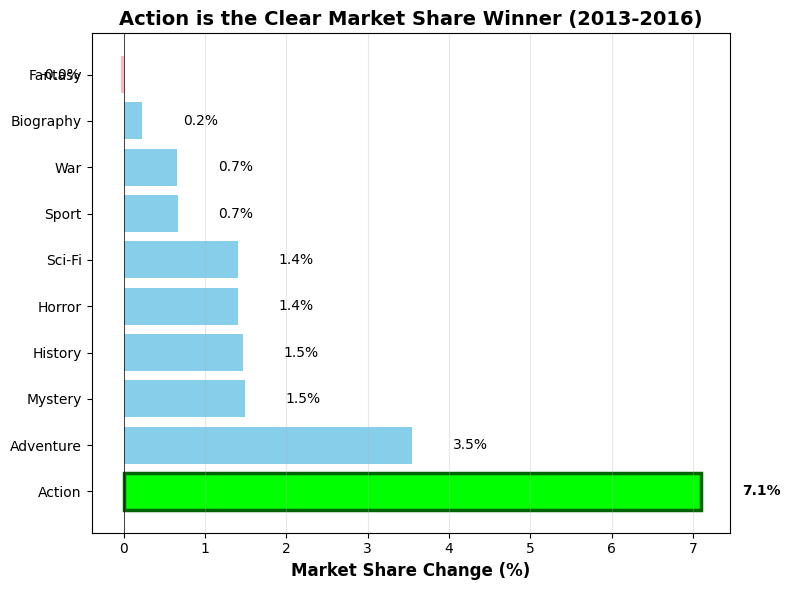

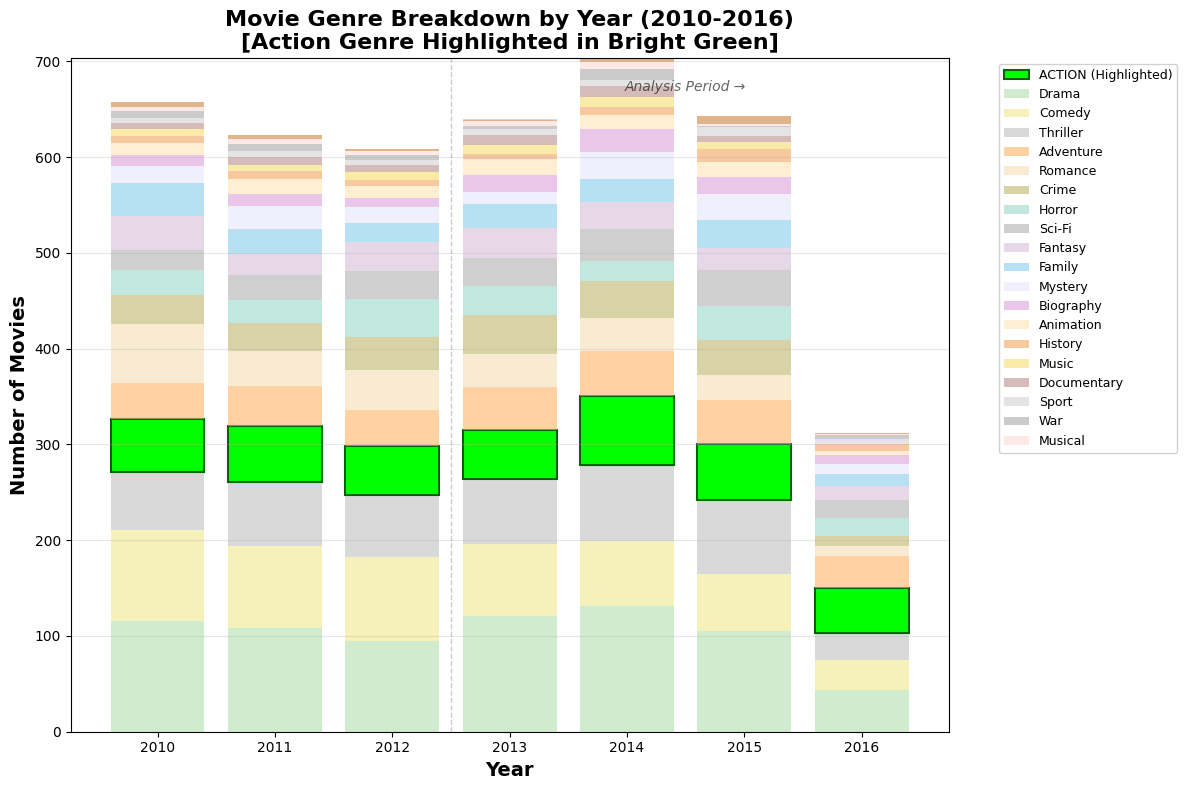

Charts created successfully!
1. market_share_winner_chart_final.png
2. movie_genre_breakdown_2010_2016_green.png


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Read the CSV file
df = pd.read_csv('../data/movie_metadata.csv')

# Clean the data
df = df.dropna(subset=['title_year'])
df['title_year'] = df['title_year'].astype(int)

# Process genres for 2010-2016 only
df_filtered = df[(df['title_year'] >= 2010) & (df['title_year'] <= 2016)]
year_genre_counts = defaultdict(lambda: defaultdict(int))
all_genres = set()

for idx, row in df_filtered.iterrows():
    year = int(row['title_year'])
    if pd.notna(row['genres']):
        genres = row['genres'].split('|')
        for genre in genres:
            all_genres.add(genre)
            year_genre_counts[year][genre] += 1

# ============================================================================
# FIGURE 1: Market Share Winners & Losers Chart
# ============================================================================

# Calculate market share changes for 2013-2016
recent_years = [2013, 2014, 2015, 2016]
yearly_totals = {year: sum(year_genre_counts[year].values()) for year in recent_years}

genre_performance = {}
MIN_AVG_MOVIES = 5

for genre in all_genres:
    counts_recent = [year_genre_counts[year][genre] for year in recent_years]
    avg_count = np.mean(counts_recent)
    
    if avg_count >= MIN_AVG_MOVIES:
        percentages = [(year_genre_counts[year][genre] / yearly_totals[year] * 100) 
                      if yearly_totals[year] > 0 else 0 for year in recent_years]
        market_share_change = percentages[-1] - percentages[0]
        
        genre_performance[genre] = {
            'market_share_change': market_share_change,
            '2013': counts_recent[0],
            '2016': counts_recent[-1]
        }

# Sort by market share change
by_market_share = sorted(genre_performance.items(), key=lambda x: x[1]['market_share_change'], reverse=True)

# Create the market share chart
fig1, ax1 = plt.subplots(figsize=(8, 6))

genres_ms = [g[0] for g in by_market_share[:10]]
ms_changes = [g[1]['market_share_change'] for g in by_market_share[:10]]

# Colors - highlight Action in bright green
colors_ms = []
for genre, change in zip(genres_ms, ms_changes):
    if genre == 'Action':
        colors_ms.append('#00FF00')  # Bright green for Action
    elif change > 0:
        colors_ms.append('#87CEEB')  # Sky blue for positive
    else:
        colors_ms.append('#FFB6C1')  # Light pink for negative

bars1 = ax1.barh(range(len(genres_ms)), ms_changes, color=colors_ms)

# Highlight Action bar with thicker edge
for i, genre in enumerate(genres_ms):
    if genre == 'Action':
        bars1[i].set_edgecolor('darkgreen')
        bars1[i].set_linewidth(2.5)

ax1.set_yticks(range(len(genres_ms)))
ax1.set_yticklabels(genres_ms)
ax1.set_xlabel('Market Share Change (%)', fontsize=12, fontweight='bold')
ax1.set_title('Action is the Clear Market Share Winner (2013-2016)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')
ax1.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

# Add value labels
for i, (bar, value) in enumerate(zip(bars1, ms_changes)):
    ax1.text(value + 0.5 if value >= 0 else value - 0.5, 
             bar.get_y() + bar.get_height()/2, 
             f'{value:.1f}%', 
             ha='left' if value >= 0 else 'right', 
             va='center',
             fontweight='bold' if genres_ms[i] == 'Action' else 'normal')

plt.tight_layout()
plt.savefig('market_share_winner_chart_final.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# FIGURE 2: Stacked Bar Chart for 2010-2016 with Bright Green Action
# ============================================================================

# Get genre totals for ordering
genre_totals = defaultdict(int)
for year in year_genre_counts:
    for genre, count in year_genre_counts[year].items():
        genre_totals[genre] += count

# Get sorted genres
sorted_genres = sorted(genre_totals.items(), key=lambda x: x[1], reverse=True)
all_genre_names = [g[0] for g in sorted_genres if g[0] in all_genres]

# Prepare data for 2010-2016 only
years = sorted([year for year in year_genre_counts.keys()])  # This will be 2010-2016
genre_data = []
for genre in all_genre_names:
    genre_counts = [year_genre_counts[year][genre] for year in years]
    genre_data.append(genre_counts)

# Create the stacked bar chart
fig2, ax2 = plt.subplots(figsize=(12, 8))

# Define colors - BRIGHT GREEN for Action, muted for others
colors = []
for genre in all_genre_names:
    if genre == 'Action':
        colors.append('#00FF00')  # BRIGHT GREEN for Action (same as market share chart)
    elif genre == 'Adventure':
        colors.append('#FFB366')  # Muted orange
    elif genre == 'Animation':
        colors.append('#FFE4B5')  # Muted peach
    elif genre == 'Biography':
        colors.append('#DDA0DD')  # Muted plum
    elif genre == 'Comedy':
        colors.append('#F0E68C')  # Muted khaki
    elif genre == 'Crime':
        colors.append('#BDB76B')  # Muted dark khaki
    elif genre == 'Documentary':
        colors.append('#BC8F8F')  # Muted rosy brown
    elif genre == 'Drama':
        colors.append('#B0E0B0')  # Muted light green (lighter than Action)
    elif genre == 'Family':
        colors.append('#87CEEB')  # Muted sky blue
    elif genre == 'Fantasy':
        colors.append('#D8BFD8')  # Muted thistle
    elif genre == 'History':
        colors.append('#F4A460')  # Muted sandy brown
    elif genre == 'Horror':
        colors.append('#98D8C8')  # Muted mint
    elif genre == 'Music':
        colors.append('#F7DC6F')  # Muted yellow
    elif genre == 'Musical':
        colors.append('#FADBD8')  # Muted blush
    elif genre == 'Mystery':
        colors.append('#E6E6FA')  # Muted lavender
    elif genre == 'News':
        colors.append('#B0C4DE')  # Muted light steel blue
    elif genre == 'Romance':
        colors.append('#F5DEB3')  # Muted wheat
    elif genre == 'Sci-Fi':
        colors.append('#B0B0B0')  # Muted gray
    elif genre == 'Sport':
        colors.append('#D3D3D3')  # Light gray
    elif genre == 'Thriller':
        colors.append('#C0C0C0')  # Silver
    elif genre == 'War':
        colors.append('#A9A9A9')  # Dark gray
    elif genre == 'Western':
        colors.append('#CD853F')  # Muted peru
    else:
        colors.append('#E0E0E0')  # Very light gray for any others

# Create the stacked bars
bottom = np.zeros(len(years))
bars = []
for i, (genre, counts) in enumerate(zip(all_genre_names, genre_data)):
    if genre == 'Action':
        # Make Action stand out with bright green and dark edge
        bar = ax2.bar(years, counts, bottom=bottom, label=genre, 
                     color=colors[i], width=0.8, alpha=1.0, edgecolor='darkgreen', linewidth=1.5)
    else:
        # Muted appearance for other genres
        bar = ax2.bar(years, counts, bottom=bottom, label=genre, 
                     color=colors[i], width=0.8, alpha=0.6)
    bars.append(bar)
    bottom += counts

# Customize the plot
ax2.set_xlabel('Year', fontsize=14, fontweight='bold')
ax2.set_ylabel('Number of Movies', fontsize=14, fontweight='bold')
ax2.set_title('Movie Genre Breakdown by Year (2010-2016)\n[Action Genre Highlighted in Bright Green]', 
             fontsize=16, fontweight='bold')

# Set x-axis ticks for each year
ax2.set_xticks(years)
ax2.set_xticklabels(years)

# Add grid
ax2.grid(True, alpha=0.3, axis='y')

# Add vertical line to mark analysis period
ax2.axvline(x=2012.5, color='black', linestyle='--', alpha=0.2, linewidth=1)
ax2.text(2014.5, ax2.get_ylim()[1]*0.95, 'Analysis Period →', 
        fontsize=10, ha='center', style='italic', alpha=0.6)

# Create custom legend with Action first and highlighted
handles, labels = ax2.get_legend_handles_labels()
action_idx = labels.index('Action') if 'Action' in labels else None

if action_idx is not None:
    # Reorder to put Action first
    new_handles = [handles[action_idx]] + handles[:action_idx] + handles[action_idx+1:]
    new_labels = ['ACTION (Highlighted)'] + labels[:action_idx] + labels[action_idx+1:]
else:
    new_handles = handles
    new_labels = labels

# Add legend with smaller font
ax2.legend(new_handles[:20], new_labels[:20], bbox_to_anchor=(1.05, 1), 
          loc='upper left', ncol=1, fontsize=9, framealpha=0.9)

plt.tight_layout()
plt.savefig('movie_genre_breakdown_2010_2016_green.png', dpi=300, bbox_inches='tight')
plt.show()

print("Charts created successfully!")
print("1. market_share_winner_chart_final.png")
print("2. movie_genre_breakdown_2010_2016_green.png")

